/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  58  82
  83  84  85 111 112 140 168 196 476 560 644 671 672 673 699 700 701 727
 728 729 730 731 754 755 756 757 758 759 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature

Best parameters:  {'kernel': 'linear', 'gamma': 'auto', 'C': 5}
Accuracy:  0.9109107142857142
Accuracy: 0.9178571428571428
Confusion matrix:
[[1301    1    5    2    3   10   10    2    7    2]
 [   1 1559    3   11    2    4    0    8    9    3]
 [  10   15 1254   15   19    7   17   19   22    2]
 [   5    8   32 1280    2   54    6   15   25    6]
 [   3    4   11    3 1185    3    7    5    4   70]
 [   7    8   12   62    7 1135   18    1   15    8]
 [  11    4   24    2   13   19 1321    0    2    0]
 [   3   11   30    4   14    3    2 1409    4   23]
 [  12   16   18   44    9   39   14   16 1177   12]
 [  11   12    8   19   78    6    0   43   14 1229]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.91      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.89      0.92 

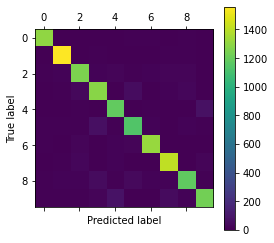

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=200)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Normalization of attributes using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM classifier
svm = SVC(kernel='linear')

# Define parameter grid for random search
param_dist = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
n_iter_search = 5

# Perform random search
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=n_iter_search, cv=5)
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters: ", random_search.best_params_)
print("Accuracy: ", random_search.best_score_)

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm.predict(X_test)

# Evaluation metrics
accuracy = svm.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{cm}")
print(f"Classification report:\n{report}")

# Visualize the confusion matrix
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
